# Spylon Kernel Test with Spark 2.1

---

# Initialization of the spark context

Note that we can set things like driver memory etc.

If `launcher._spark_home` is not set it will default to looking at the `SPARK_HOME` environment variable.

In [ ]:
%%init_spark
launcher.num_executors = 4
launcher.executor_cores = 2
launcher.driver_memory = '4g'
launcher.conf.set("spark.sql.catalogImplementation", "hive")

If you have additional jars you want available in the Spark runtime,use the `launcher.jars` and/or `launcher.packages` settings, the latter using Maven "GAV" coordinates:
```scala
launcher.jars = ["/some/local/path/to/a/file.jar"]
launcher.packages = ["com.acme:super:1.0.1"]
```

# Lets write some scala!

In [2]:
spark

'Intitializing scala interpreter....'

'Scala interpreter initialized.'

res1: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@174541


In [3]:
spark.version

res2: String = 2.1.0


In [4]:
val data = Seq("a", "b", "c", "d") zip (0 to 4)

data: Seq[(String, Int)] = List((a,0), (b,1), (c,2), (d,3))


In [5]:
val ds = spark.createDataset(data)

ds: org.apache.spark.sql.Dataset[(String, Int)] = [_1: string, _2: int]


## We can define functions and classes as we need them

In [6]:
case class DataRow(name: String, value: Integer)

defined class DataRow


In [7]:
val ds2 = ds.map{case (a, b) => DataRow(a,b)}

ds2: org.apache.spark.sql.Dataset[DataRow] = [name: string, value: int]


In [8]:
def add(x: Integer, y: Integer) = x + y

add: (x: Integer, y: Integer)Int


In [9]:
add(7, 8)

res3: Int = 15


# Sharing scala spark datasets with python

We can share a dataset by registering it as a view.  The spark session that exists in the python magic is the same one as on the scala side.

In [10]:
ds2.toDF.createOrReplaceTempView("foo2")

In [11]:
%%python
df = spark.sql("select name from foo2")

In [12]:
%%python
df

DataFrame[name: string]

# Plotting example

Plotting with matplotlib can be a little tedious but still pretty simple to do.


In [13]:
%%python
import matplotlib
matplotlib.use("agg")

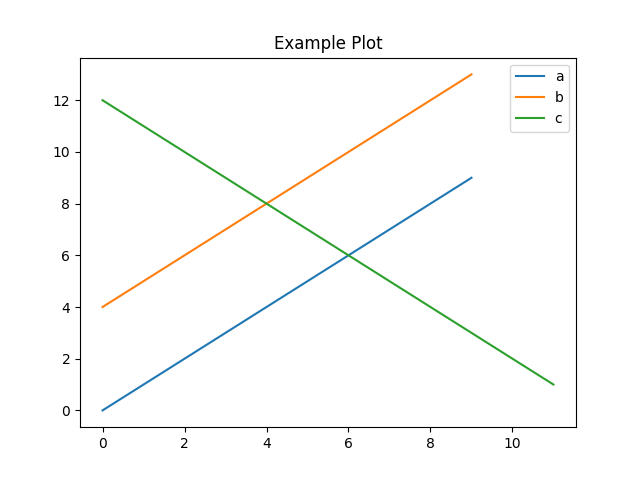

In [14]:
%%python
from matplotlib import pyplot as plt
from IPython.display import Image
import tempfile
plt.clf()
plt.plot(range(10), label="a")
plt.plot(range(4, 14), label="b")
plt.plot(range(12, 0, -1), label="c")
plt.legend()
plt.title("Example Plot")
with tempfile.NamedTemporaryFile(suffix=".png") as fo:
    plt.savefig(fo.name)
    retval = Image(filename=fo.name)